In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filepath = "data/train.csv"

In [4]:
data = pd.read_csv(filepath)

In [5]:
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
sum(data["Age"] < 18)

0

In [8]:
continuous_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
categorical_columns = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]
target = "Exited"

In [10]:
data[continuous_columns].corrwith(data[target])

CreditScore       -0.027383
Age                0.340768
Tenure            -0.019565
Balance            0.129743
NumOfProducts     -0.214554
EstimatedSalary    0.018827
dtype: float64

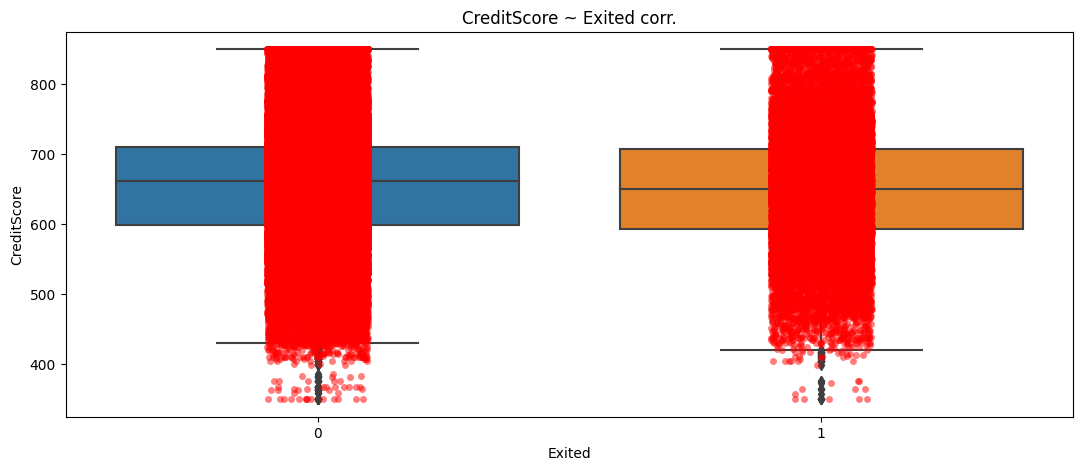

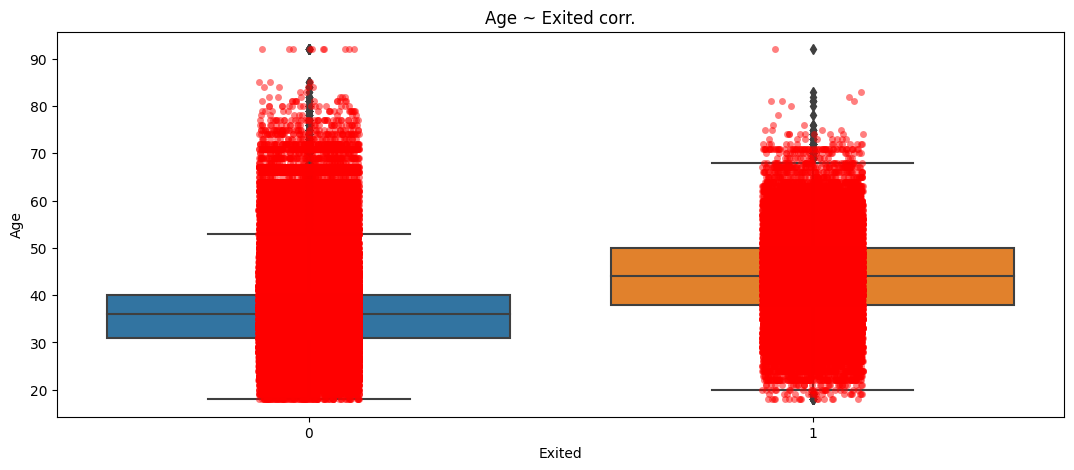

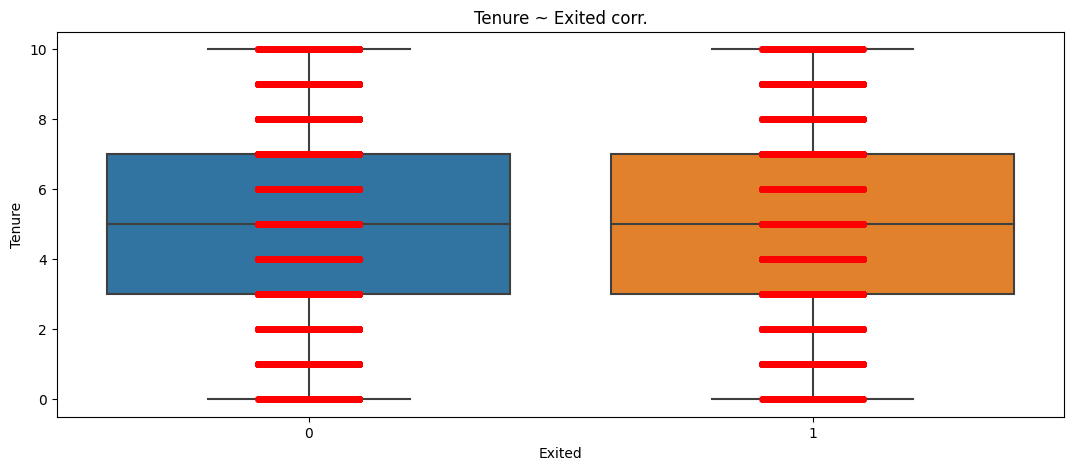

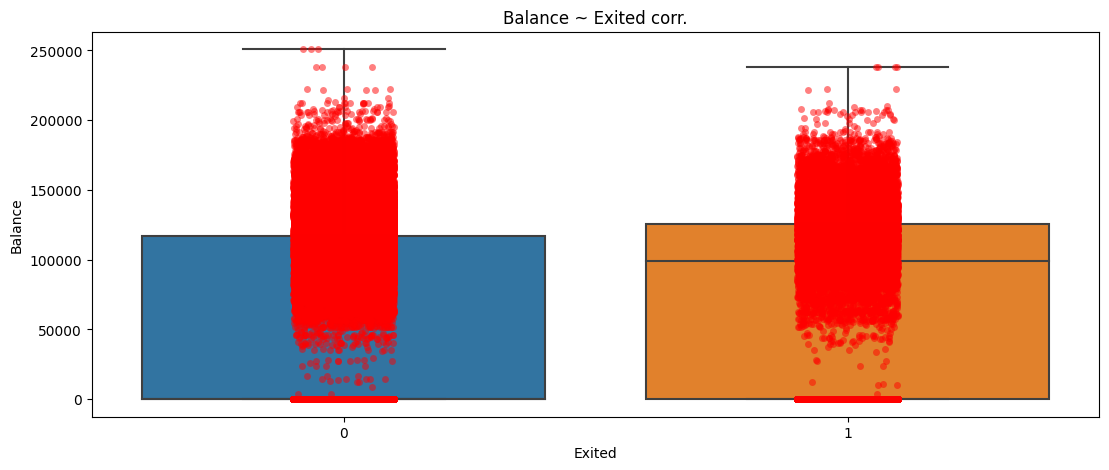

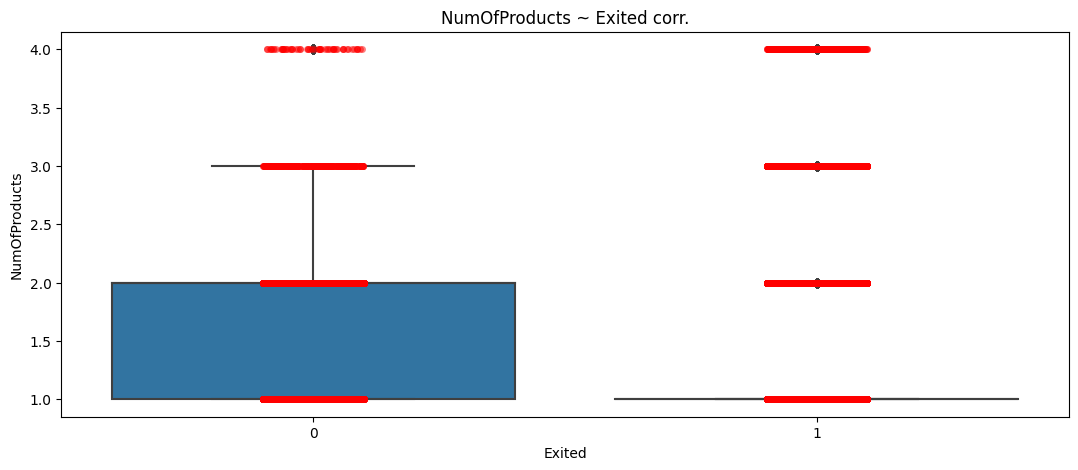

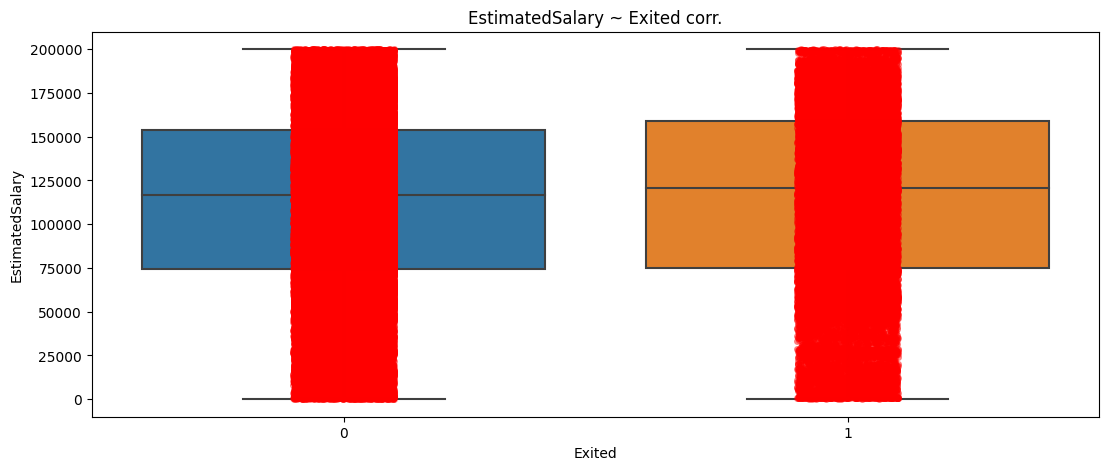

In [18]:
for feature in continuous_columns:
    plt.figure(figsize=(13, 5))
    sns.boxplot(x=target, y=feature, data=data)
    sns.stripplot(x=target, y=feature, data=data, color="red", alpha=0.5, jitter=True)
    plt.title(f"{feature} ~ {target} corr.")
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

In [23]:
print(data["Geography"][data[target] == 0])

0         France
1         France
2         France
3         France
4          Spain
           ...  
165028    France
165029     Spain
165030    France
165031    France
165032     Spain
Name: Geography, Length: 130113, dtype: object


In [27]:
[f for f in data["Geography"].unique()]

['France', 'Spain', 'Germany']

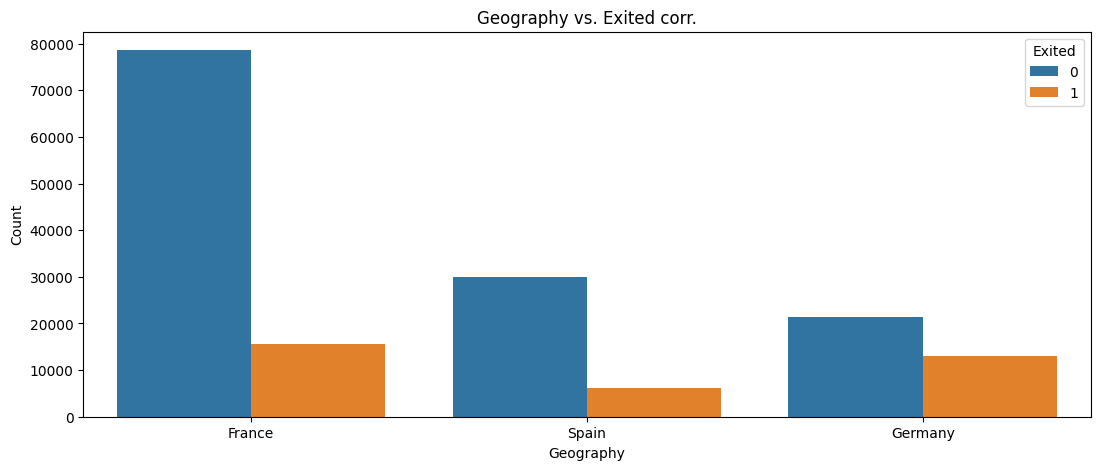

[5.050282558438222, 4.808019246190858, 1.6388592344059782]


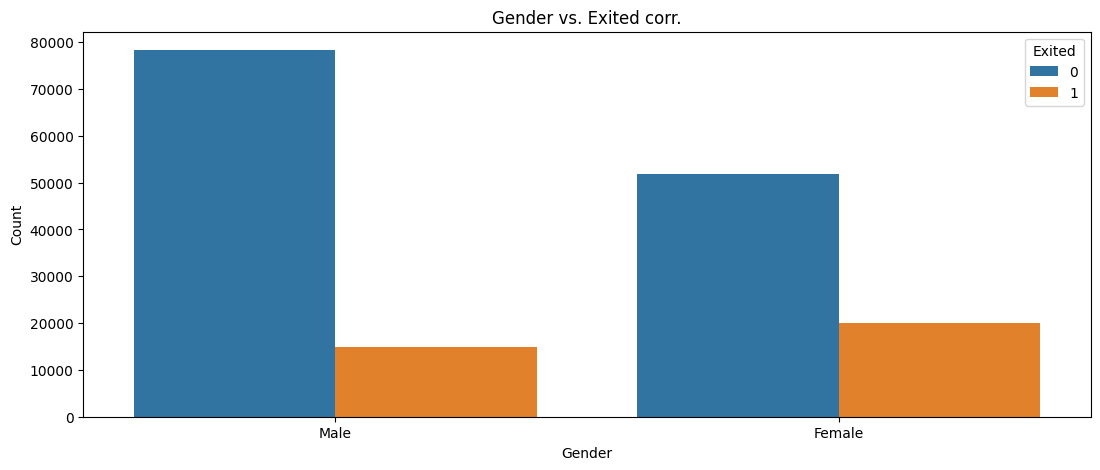

[5.287122030237581, 2.5754289977617506]


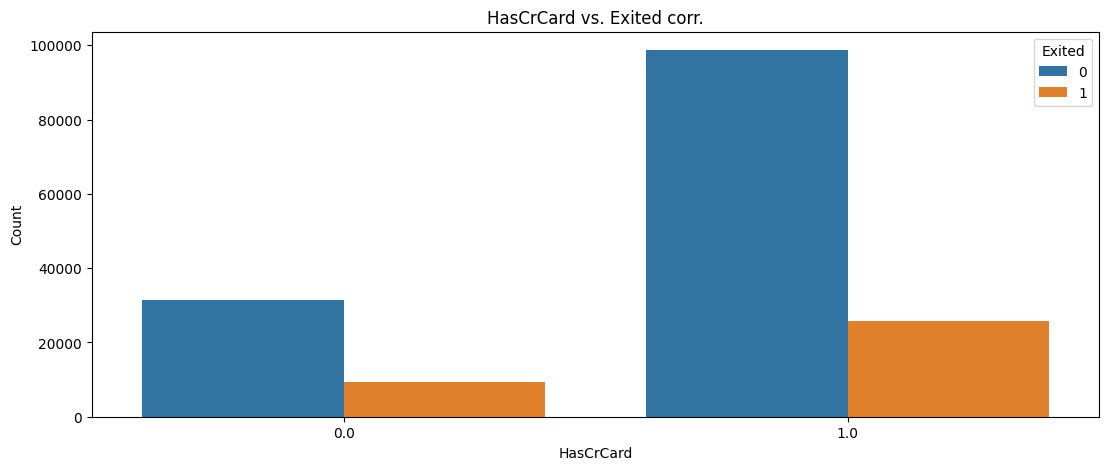

[3.8441952814762907, 3.3969680563075255]


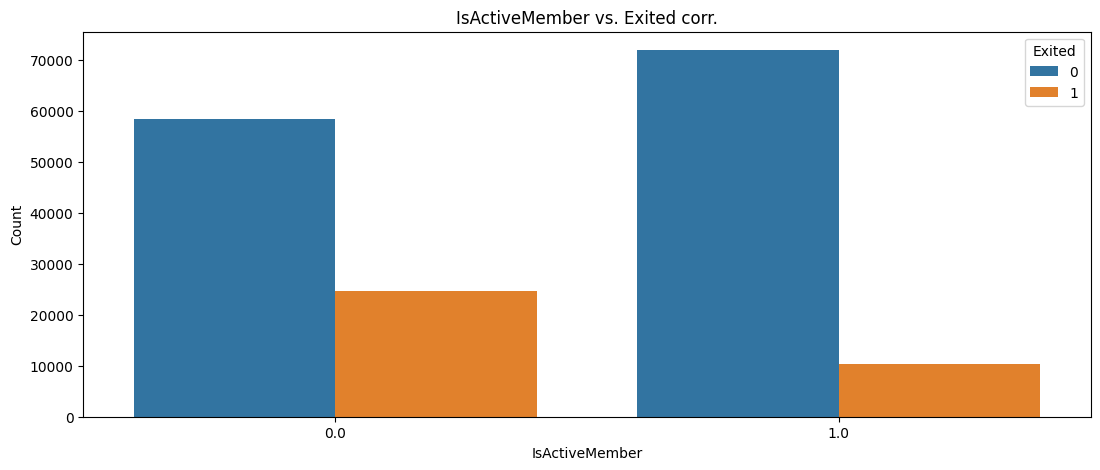

[2.3660250162443144, 6.977954744100224]


In [30]:
for feature in categorical_columns:
    plt.figure(figsize=(13, 5))
    sns.countplot(x=feature, hue=target, data=data)
    plt.title(f"{feature} vs. {target} corr.")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()
    print([(data[(data[feature] == f) & (data[target] == 0)].shape[0] / data[(data[feature] == f) & (data[target] == 1)].shape[0]) for f in data[feature].unique()])

In [33]:
effective_features = ["CreditScore", "Age", "Balance", "NumOfProducts", "Geography", "Gender", "IsActiveMember"]

In [34]:
data[effective_features].head()

,Age,Balance,NumOfProducts,EstimatedSalary,Geography,Gender,IsActiveMember
0,33.0,0.00,2,181449.97,France,Male,0.0
1,33.0,0.00,2,49503.50,France,Male,1.0
2,40.0,0.00,2,184866.69,France,Male,0.0
3,34.0,148882.54,1,84560.88,France,Male,1.0
4,33.0,0.00,2,15068.83,Spain,Male,1.0


In [11]:
print(sum(data[target] == 0), sum(data[target] == 1))

130113 34921


In [12]:
data.shape

(165034, 14)